In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

x_train_mlp = x_train.reshape(-1, 784)
x_test_mlp = x_test.reshape(-1, 784)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Training data shape (CNN): {x_train_cnn.shape}")
print(f"Training data shape (MLP): {x_train_mlp.shape}")
print(f"Test data shape (CNN): {x_test_cnn.shape}")
print(f"Labels shape: {y_train_cat.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape (CNN): (60000, 28, 28, 1)
Training data shape (MLP): (60000, 784)
Test data shape (CNN): (10000, 28, 28, 1)
Labels shape: (60000, 10)


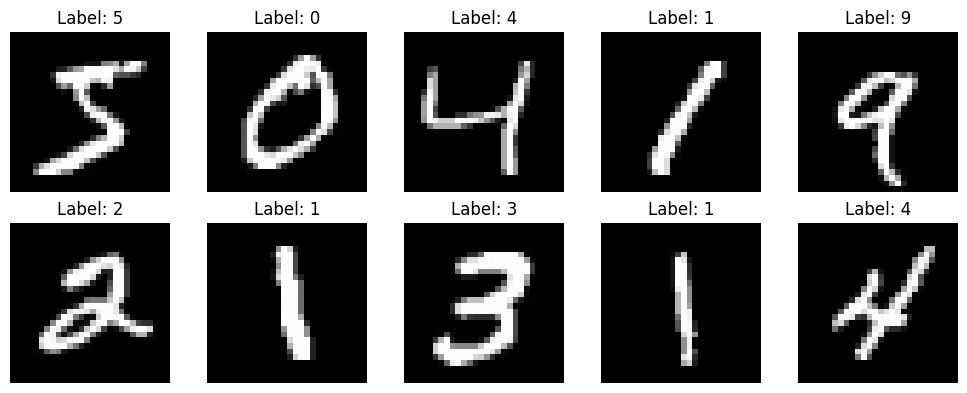

In [3]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
def create_cnn(activation='relu', fc_units=128, dropout_rate=0.25, use_batch_norm=False):
    model = models.Sequential([

        layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)),

        layers.Conv2D(64, (3, 3), activation=activation),

        layers.MaxPooling2D((2, 2)),

        layers.Dropout(dropout_rate),

        layers.Flatten(),

        layers.Dense(fc_units, activation=activation),

        layers.Dense(10, activation='softmax')
    ])
    return model

In [5]:
def create_mlp(activation='relu', hidden_units=[256, 128],
               use_batch_norm=True, dropout_rate=0.25):
    model = models.Sequential()
    model.add(layers.Input(shape=(784,)))

    for i, units in enumerate(hidden_units):
        model.add(layers.Dense(units))
        if use_batch_norm:
            model.add(layers.BatchNormalization())
        model.add(layers.Activation(activation))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(10, activation='softmax'))
    return model

In [6]:
def train_model(model, optimizer, x_train, y_train, epochs=10):
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=128,
        validation_split=0.2,   # 20% of training data for validation
        verbose=1
    )

    return history


In [8]:
print("=" * 60)
print("TASK 1: ACTIVATION FUNCTION CHALLENGE")
print("=" * 60)

activation_results = []
activation_histories = {}

activations = ['sigmoid', 'tanh', 'relu']

for act in activations:
    print(f"\n{'='*50}")
    print(f"Training CNN with {act.upper()} activation")
    print(f"{'='*50}")

    model = create_cnn(activation=act, fc_units=128)
    optimizer = optimizers.Adam()

    history = train_model(model, optimizer, x_train_cnn, y_train_cat, epochs=10)

    # Store results
    final_acc = history.history['val_accuracy'][-1]
    activation_results.append({
        'Activation': act,
        'Optimizer': 'Adam',
        'Epochs': 10,
        'Final Train Accuracy': f"{history.history['accuracy'][-1]:.4f}",
        'Final Test Accuracy': f"{final_acc:.4f}"
    })

    activation_histories[act] = history.history

print("\n" + "="*60)
print("TASK 1 RESULTS")
print("="*60)
df_activation = pd.DataFrame(activation_results)
print(df_activation.to_string(index=False))

TASK 1: ACTIVATION FUNCTION CHALLENGE

Training CNN with SIGMOID activation
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1076 - loss: 2.4239 - val_accuracy: 0.1060 - val_loss: 2.3046
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1077 - loss: 2.3044 - val_accuracy: 0.1060 - val_loss: 2.2639
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7120 - loss: 1.0127 - val_accuracy: 0.9330 - val_loss: 0.2564
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9315 - loss: 0.2492 - val_accuracy: 0.9493 - val_loss: 0.1883
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9505 - loss: 0.1766 - val_accuracy: 0.9627 - val_loss: 0.1408
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9647 - loss: 0.1292 - val_accuracy: 0.9717 - val_loss: 0.1037
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9750 - loss: 0.0949 - val_accuracy: 0.9768 - val_loss: 0.0843
Epoch 8/10
375/375 ━━━━━━━

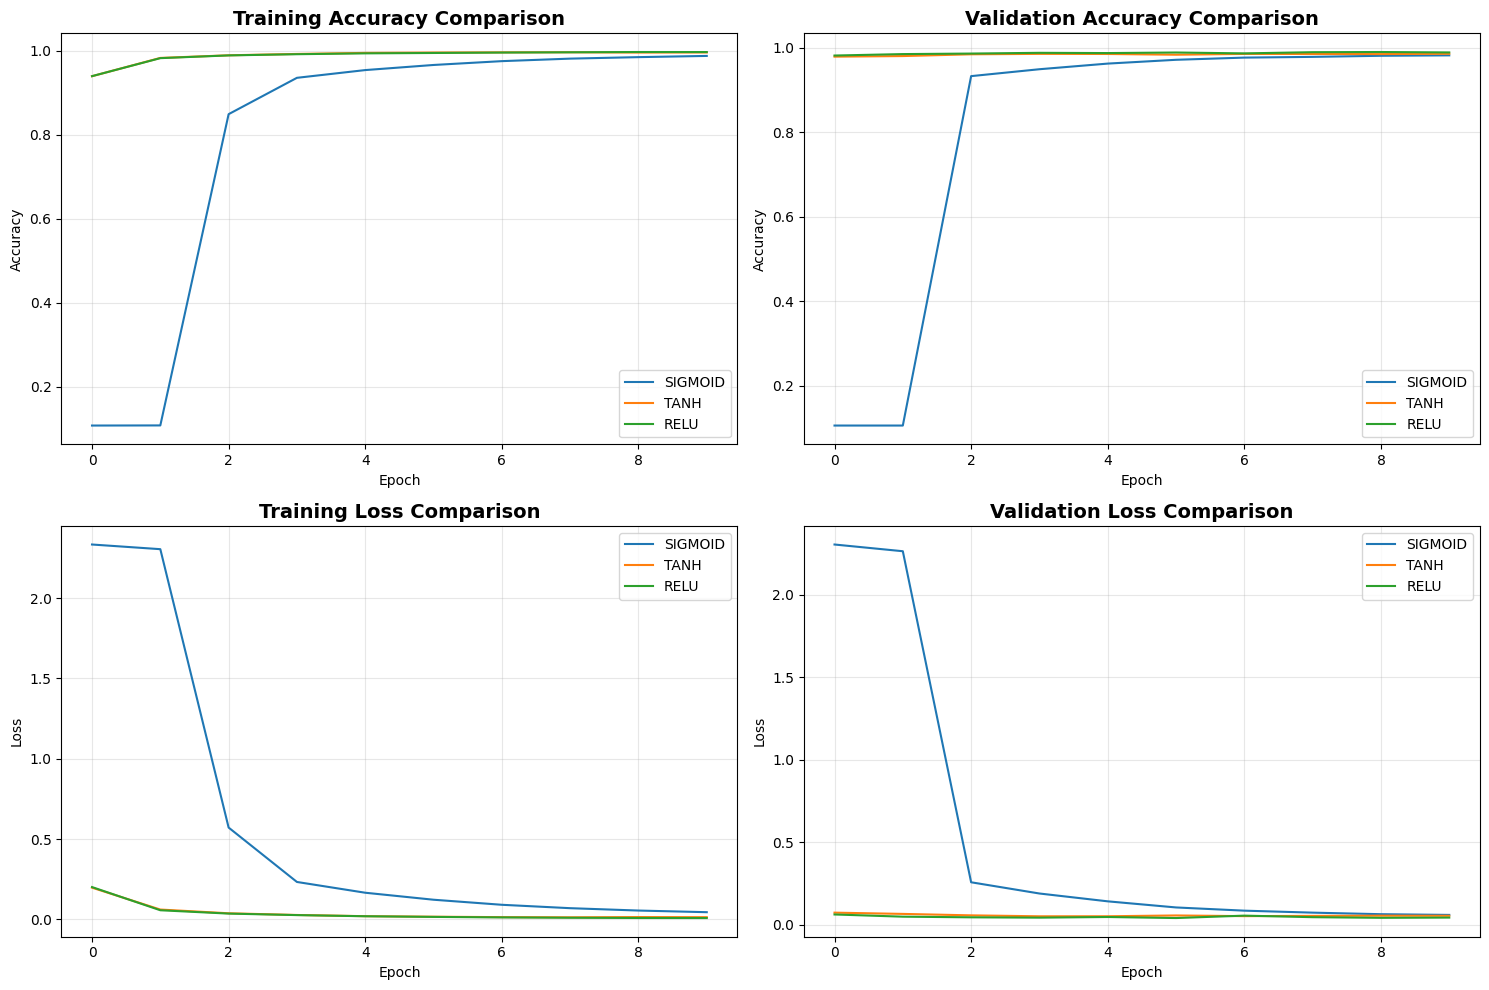

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training Accuracy
for act in activations:
    axes[0, 0].plot(activation_histories[act]['accuracy'], label=act.upper())
axes[0, 0].set_title('Training Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Validation Accuracy
for act in activations:
    axes[0, 1].plot(activation_histories[act]['val_accuracy'], label=act.upper())
axes[0, 1].set_title('Validation Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Training Loss
for act in activations:
    axes[1, 0].plot(activation_histories[act]['loss'], label=act.upper())
axes[1, 0].set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Validation Loss
for act in activations:
    axes[1, 1].plot(activation_histories[act]['val_loss'], label=act.upper())
axes[1, 1].set_title('Validation Loss Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
print("\n" + "=" * 60)
print("TASK 2: OPTIMIZER SHOWDOWN (Using ReLU)")
print("=" * 60)

optimizer_results = []
optimizer_histories = {}

# Define optimizers
optimizer_configs = {
    'SGD': optimizers.SGD(learning_rate=0.01),
    'SGD_Momentum': optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Adam': optimizers.Adam()
}

for opt_name, opt in optimizer_configs.items():
    print(f"\n{'='*50}")
    print(f"Training CNN with {opt_name}")
    print(f"{'='*50}")

    model = create_cnn(activation='relu', fc_units=128)

    history = train_model(model, opt, x_train_cnn, y_train_cat, epochs=10)

    # Store results
    final_acc = history.history['val_accuracy'][-1]
    optimizer_results.append({
        'Activation': 'ReLU',
        'Optimizer': opt_name,
        'Epochs': 10,
        'Final Train Accuracy': f"{history.history['accuracy'][-1]:.4f}",
        'Final Test Accuracy': f"{final_acc:.4f}"
    })

    optimizer_histories[opt_name] = history.history

print("\n" + "="*60)
print("TASK 2 RESULTS")
print("="*60)
df_optimizer = pd.DataFrame(optimizer_results)
print(df_optimizer.to_string(index=False))


TASK 2: OPTIMIZER SHOWDOWN (Using ReLU)

Training CNN with SGD
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5653 - loss: 1.5114 - val_accuracy: 0.9070 - val_loss: 0.3144
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8945 - loss: 0.3521 - val_accuracy: 0.9286 - val_loss: 0.2450
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9126 - loss: 0.2911 - val_accuracy: 0.9368 - val_loss: 0.2122
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9263 - loss: 0.2441 - val_accuracy: 0.9448 - val_loss: 0.1886
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9362 - loss: 0.2097 - val_accuracy: 0.9556 - val_loss: 0.1572
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9440 - loss: 0.1836 - val_accuracy: 0.9584 - val_loss: 0.1427
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9495 - loss: 0.1642 - val_accuracy: 0.9543 - val_loss: 0.1527
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━

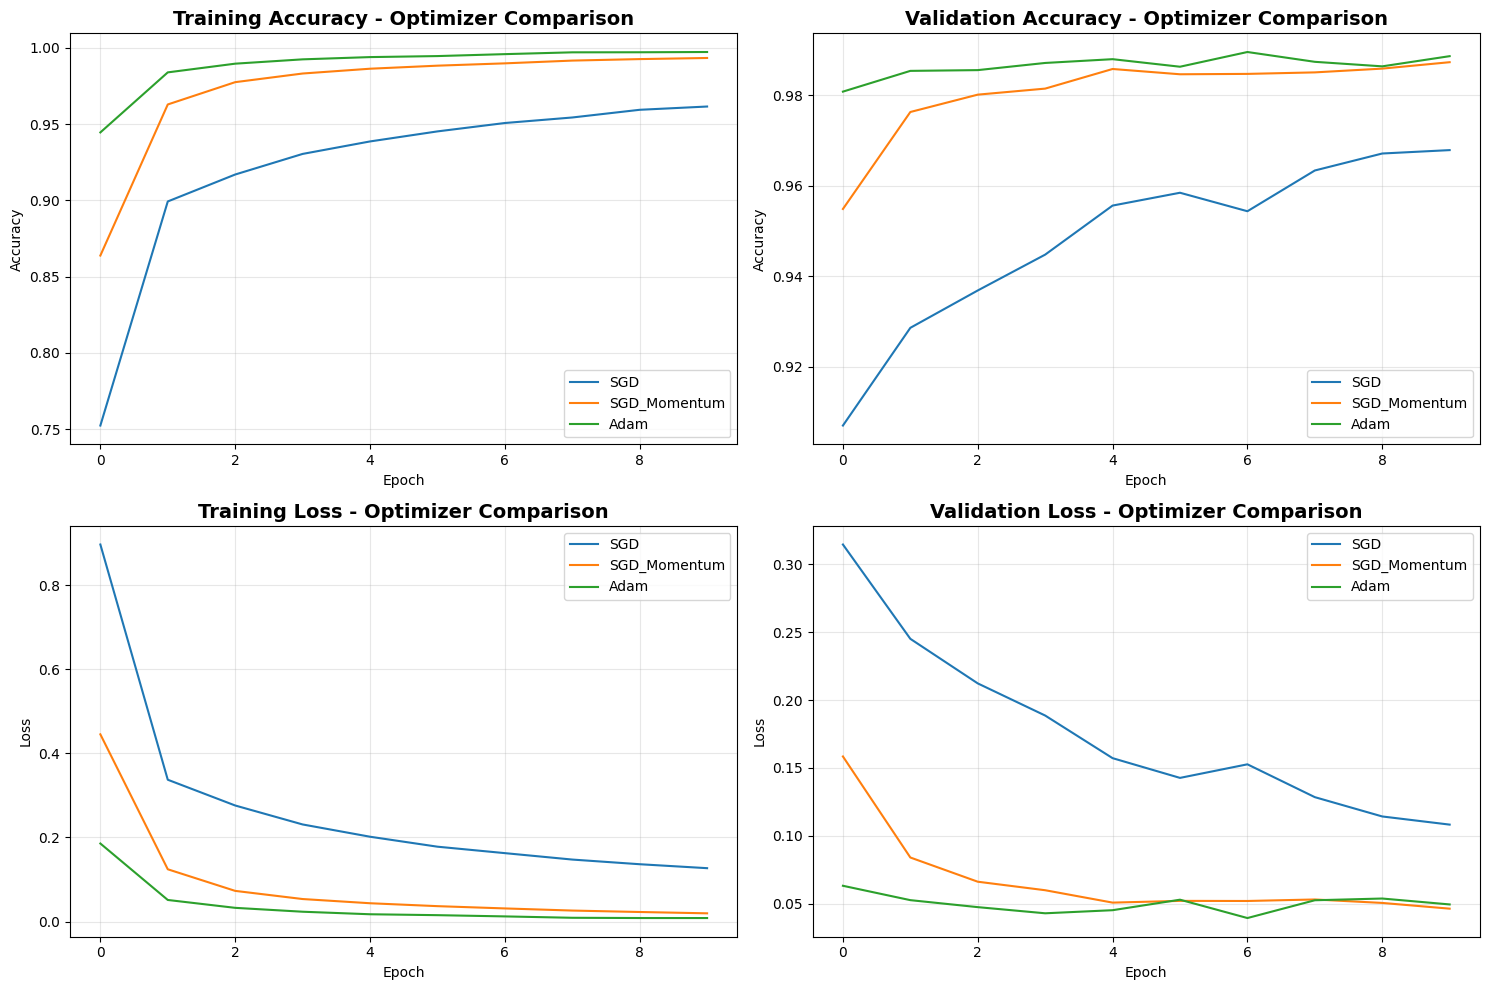

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training Accuracy
for opt_name in optimizer_configs.keys():
    axes[0, 0].plot(optimizer_histories[opt_name]['accuracy'], label=opt_name)
axes[0, 0].set_title('Training Accuracy - Optimizer Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Validation Accuracy
for opt_name in optimizer_configs.keys():
    axes[0, 1].plot(optimizer_histories[opt_name]['val_accuracy'], label=opt_name)
axes[0, 1].set_title('Validation Accuracy - Optimizer Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Training Loss
for opt_name in optimizer_configs.keys():
    axes[1, 0].plot(optimizer_histories[opt_name]['loss'], label=opt_name)
axes[1, 0].set_title('Training Loss - Optimizer Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Validation Loss
for opt_name in optimizer_configs.keys():
    axes[1, 1].plot(optimizer_histories[opt_name]['val_loss'], label=opt_name)
axes[1, 1].set_title('Validation Loss - Optimizer Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [20]:
print("\n" + "=" * 60)
print("TASK 3: BATCH NORMALIZATION & DROPOUT IMPACT")
print("=" * 60)

task3_results = []
task3_histories = {}
scenarios = [
    {'name': 'Without BN, Dropout=0', 'use_bn': False, 'dropout': 0.0},
    {'name': 'Without BN, Dropout=0.1', 'use_bn': False, 'dropout': 0.1},
    {'name': 'With BN, Dropout=0.25', 'use_bn': True, 'dropout': 0.25}
]

for scenario in scenarios:
    print(f"\n{'='*50}")
    print(f"Training MLP: {scenario['name']}")
    print(f"{'='*50}")

    model = create_mlp(
        activation='relu',
        hidden_units=[256, 128],
        use_batch_norm=scenario['use_bn'],
        dropout_rate=scenario['dropout']
    )

    optimizer = optimizers.Adam()

    history = train_model(model, optimizer, x_train_mlp, y_train_cat, epochs=15)

    # Store results
    final_acc = history.history['val_accuracy'][-1]
    task3_results.append({
        'Scenario': scenario['name'],
        'Batch Norm': 'Yes' if scenario['use_bn'] else 'No',
        'Dropout': scenario['dropout'],
        'Final Train Accuracy': f"{history.history['accuracy'][-1]:.4f}",
        'Final Test Accuracy': f"{final_acc:.4f}"
    })

    task3_histories[scenario['name']] = history.history

print("\n" + "="*60)
print("TASK 3 RESULTS")
print("="*60)
df_task3 = pd.DataFrame(task3_results)
print(df_task3.to_string(index=False))


TASK 3: BATCH NORMALIZATION & DROPOUT IMPACT

Training MLP: Without BN, Dropout=0
Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8387 - loss: 0.5606 - val_accuracy: 0.9454 - val_loss: 0.1791
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.1237 - val_accuracy: 0.9653 - val_loss: 0.1174
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0794 - val_accuracy: 0.9737 - val_loss: 0.0907
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9837 - loss: 0.0541 - val_accuracy: 0.9719 - val_loss: 0.0896
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0380 - val_accuracy: 0.9738 - val_loss: 0.0886
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9916 - loss: 0.0289 - val_accuracy: 0.9727 - val_loss: 0.0976
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9932 - loss: 0.0223 - val_accuracy: 0.9764 - val_loss: 0.0891
Epoch 8/15
375/375 ━━

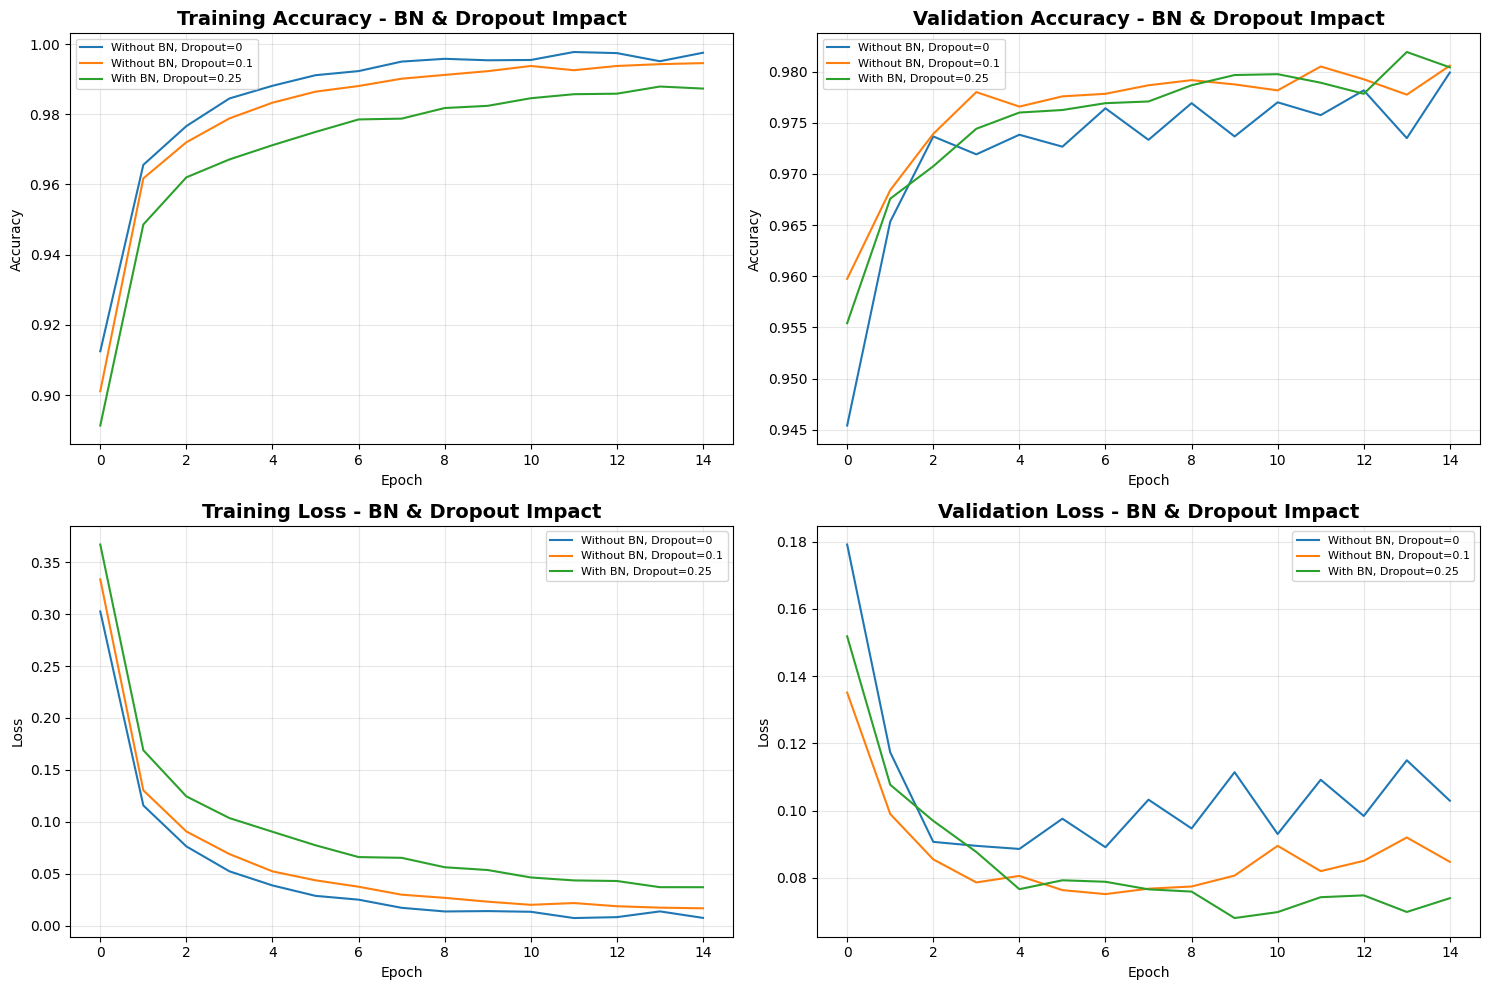

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training Accuracy
for scenario_name in task3_histories.keys():
    axes[0, 0].plot(task3_histories[scenario_name]['accuracy'], label=scenario_name)
axes[0, 0].set_title('Training Accuracy - BN & Dropout Impact', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend(fontsize=8)
axes[0, 0].grid(True, alpha=0.3)

# Validation Accuracy
for scenario_name in task3_histories.keys():
    axes[0, 1].plot(task3_histories[scenario_name]['val_accuracy'], label=scenario_name)
axes[0, 1].set_title('Validation Accuracy - BN & Dropout Impact', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend(fontsize=8)
axes[0, 1].grid(True, alpha=0.3)

# Training Loss
for scenario_name in task3_histories.keys():
    axes[1, 0].plot(task3_histories[scenario_name]['loss'], label=scenario_name)
axes[1, 0].set_title('Training Loss - BN & Dropout Impact', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend(fontsize=8)
axes[1, 0].grid(True, alpha=0.3)

# Validation Loss
for scenario_name in task3_histories.keys():
    axes[1, 1].plot(task3_histories[scenario_name]['val_loss'], label=scenario_name)
axes[1, 1].set_title('Validation Loss - BN & Dropout Impact', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend(fontsize=8)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [23]:
print("\n" + "=" * 60)
print("TRAINING REQUIRED MODELS FROM TABLE")
print("=" * 60)

required_models_results = []
required_models_histories = {}

# CNN-1: 128 FC, Adam, 10 epochs
print("\n--- Training CNN-1 ---")
cnn1 = create_cnn(activation='relu', fc_units=128, dropout_rate=0.25)
history_cnn1 = train_model(cnn1, optimizers.Adam(), x_train_cnn, y_train_cat, epochs=10)
required_models_results.append({
    'Model': 'CNN-1',
    'FC Layer': '128',
    'Optimizer': 'Adam',
    'Epochs': 10,
    'Accuracy': f"{history_cnn1.history['val_accuracy'][-1]:.4f}"
})
required_models_histories['CNN-1'] = history_cnn1.history

# MLP-1: 512-256-128, SGD, 20 epochs
print("\n--- Training MLP-1 ---")
mlp1 = create_mlp(activation='relu', hidden_units=[512, 256, 128],
                  use_batch_norm=True, dropout_rate=0.25)
history_mlp1 = train_model(mlp1, optimizers.SGD(learning_rate=0.01),
                          x_train_mlp, y_train_cat, epochs=20)
required_models_results.append({
    'Model': 'MLP-1',
    'FC Layer': '512-256-128',
    'Optimizer': 'SGD',
    'Epochs': 20,
    'Accuracy': f"{history_mlp1.history['val_accuracy'][-1]:.4f}"
})
required_models_histories['MLP-1'] = history_mlp1.history

# MLP-2: 256, Adam, 15 epochs
print("\n--- Training MLP-2 ---")
mlp2 = create_mlp(activation='relu', hidden_units=[256],
                  use_batch_norm=True, dropout_rate=0.25)
history_mlp2 = train_model(mlp2, optimizers.Adam(),
                          x_train_mlp, y_train_cat, epochs=15)
required_models_results.append({
    'Model': 'MLP-2',
    'FC Layer': '256',
    'Optimizer': 'Adam',
    'Epochs': 15,
    'Accuracy': f"{history_mlp2.history['val_accuracy'][-1]:.4f}"
})
required_models_histories['MLP-2'] = history_mlp2.history

print("\n" + "="*60)
print("REQUIRED MODELS RESULTS")
print("="*60)
df_required = pd.DataFrame(required_models_results)
print(df_required.to_string(index=False))

# Cell 14: Comprehensive Results Table
print("\n" + "=" * 60)
print("COMPREHENSIVE EXPERIMENT RESULTS TABLE")
print("=" * 60)

all_results = []

# Add Task 1 results
for i, result in enumerate(activation_results, 1):
    all_results.append({
        'Experiment': f'Task1-{i}',
        'Activation': result['Activation'],
        'Optimizer': result['Optimizer'],
        'Epochs': result['Epochs'],
        'Final Accuracy': result['Final Test Accuracy']
    })

# Add Task 2 results
for i, result in enumerate(optimizer_results, 1):
    all_results.append({
        'Experiment': f'Task2-{i}',
        'Activation': result['Activation'],
        'Optimizer': result['Optimizer'],
        'Epochs': result['Epochs'],
        'Final Accuracy': result['Final Test Accuracy']
    })

df_all_results = pd.DataFrame(all_results)
print(df_all_results.to_string(index=False))


TRAINING REQUIRED MODELS FROM TABLE

--- Training CNN-1 ---
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8787 - loss: 0.4096 - val_accuracy: 0.9801 - val_loss: 0.0708
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9829 - loss: 0.0546 - val_accuracy: 0.9863 - val_loss: 0.0463
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9891 - loss: 0.0342 - val_accuracy: 0.9866 - val_loss: 0.0485
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9931 - loss: 0.0220 - val_accuracy: 0.9890 - val_loss: 0.0450
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9949 - loss: 0.0170 - val_accuracy: 0.9865 - val_loss: 0.0512
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9948 - loss: 0.0134 - val_accuracy: 0.9882 - val_loss: 0.0457
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9968 - loss: 0.0092 - val_accuracy: 0.9877 - val_loss: 0.0498
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s

In [24]:
print("\n" + "=" * 70)
print("SUMMARY AND OBSERVATIONS")
print("=" * 70)

print("\n1. ACTIVATION FUNCTION ANALYSIS:")
print("   - Sigmoid: Prone to vanishing gradients, slower convergence")
print("   - Tanh: Better than sigmoid, zero-centered, but still slower than ReLU")
print("   - ReLU: Fastest convergence, no vanishing gradient for positive values")

print("\n2. OPTIMIZER ANALYSIS:")
print("   - SGD: Stable but slower convergence")
print("   - SGD with Momentum: Smoother convergence, handles local minima better")
print("   - Adam: Fastest convergence with adaptive learning rates")

print("\n3. BATCH NORMALIZATION & DROPOUT:")
print("   - Without BN/Dropout: May overfit, unstable training")
print("   - Dropout helps prevent overfitting")
print("   - Batch Normalization speeds up training and improves stability")

print("\n" + "=" * 70)
print("PRACTICAL COMPLETED SUCCESSFULLY!")
print("=" * 70)


SUMMARY AND OBSERVATIONS

1. ACTIVATION FUNCTION ANALYSIS:
   - Sigmoid: Prone to vanishing gradients, slower convergence
   - Tanh: Better than sigmoid, zero-centered, but still slower than ReLU
   - ReLU: Fastest convergence, no vanishing gradient for positive values

2. OPTIMIZER ANALYSIS:
   - SGD: Stable but slower convergence
   - SGD with Momentum: Smoother convergence, handles local minima better
   - Adam: Fastest convergence with adaptive learning rates

3. BATCH NORMALIZATION & DROPOUT:
   - Without BN/Dropout: May overfit, unstable training
   - Dropout helps prevent overfitting
   - Batch Normalization speeds up training and improves stability

PRACTICAL COMPLETED SUCCESSFULLY!
